In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
import warnings
warnings.simplefilter("ignore")

In [3]:
fund = pd.read_csv('school_funding_allocation_2022_23.csv')

In [4]:
print(fund.shape)
fund.head()

(20177, 57)


,time_period,time_identifier,geographic_level,country_code,country_name,old_la_code,new_la_code,la_name,school_ukprn,school_urn,...,allocation_per_pupil,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding
0,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10000222,101247,...,6658.346870,291560,296,x,x,x,81972,49248,249881,8542828.0
1,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10000527,101241,...,6817.784488,492993,501,x,x,x,148598,84024,389143,13420859.0
2,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10071309,101202,...,5524.276364,209135,151,44741,20720,472,21895,24138,80619,3439599.0
3,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10071301,101231,...,5542.356295,153735,111,29116,19540,354,17927,18117,62142,2633909.0
4,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10029207,136028,...,7127.415584,511215,519,x,x,x,164595,91017,288410,9836214.0


In [5]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20177 entries, 0 to 20176
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   time_period                                20177 non-null  int64  
 1   time_identifier                            20177 non-null  object 
 2   geographic_level                           20177 non-null  object 
 3   country_code                               20177 non-null  object 
 4   country_name                               20177 non-null  object 
 5   old_la_code                                20177 non-null  int64  
 6   new_la_code                                20177 non-null  object 
 7   la_name                                    20177 non-null  object 
 8   school_ukprn                               20177 non-null  int64  
 9   school_urn                                 20177 non-null  int64  
 10  school_laestab        

In [6]:
fund.describe().T

,count,mean,std,min,25%,50%,75%,max
time_period,20177.0,2.022230e+05,0.000000e+00,202223.0,2.022230e+05,2.022230e+05,2.022230e+05,202223.0
old_la_code,20177.0,7.024099e+02,2.609454e+02,201.0,3.720000e+02,8.500000e+02,8.910000e+02,941.0
school_ukprn,20177.0,1.006348e+07,1.873333e+04,10000001.0,1.004886e+07,1.007074e+07,1.007672e+07,10090415.0
school_urn,20177.0,1.273799e+05,1.544759e+04,100000.0,1.133690e+05,1.310080e+05,1.415870e+05,149097.0
school_laestab,20177.0,7.027089e+06,2.609466e+06,2013614.0,3.722133e+06,8.504002e+06,8.912821e+06,9416910.0
basic_entitlement_primary,20177.0,7.342936e+05,5.687895e+05,0.0,3.042840e+05,6.594850e+05,1.129069e+06,5409029.0
basic_entitlement_ks3,20177.0,4.342193e+05,1.042028e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8075509.0
basic_entitlement_ks4,20177.0,3.095584e+05,7.533470e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5476346.0
basic_entitlement_total_funding,20177.0,1.478071e+06,1.585192e+06,0.0,5.854940e+05,8.781570e+05,1.444612e+06,13551855.0
fsm_funding,20177.0,4.120218e+04,5.122973e+04,0.0,9.827000e+03,2.542500e+04,5.452000e+04,1195018.0


In [7]:
# Assign missing value == 0 

fund[['universal_infant_free_school_meals_grant','pe_&_sport_premium','pe_&_sport_premium_pupils','pupil_premium','pupil_premium_pupils','coronavirus_recovery_premium_funding','School_led_tutoring_funding','schools_supplementary_grant','lac_total_funding']] = fund[['universal_infant_free_school_meals_grant','pe_&_sport_premium','pe_&_sport_premium_pupils','pupil_premium','pupil_premium_pupils','coronavirus_recovery_premium_funding','School_led_tutoring_funding','schools_supplementary_grant','lac_total_funding']].replace(regex='([a-zA-Z*])', value=0).astype(int)

In [8]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20177 entries, 0 to 20176
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   time_period                                20177 non-null  int64  
 1   time_identifier                            20177 non-null  object 
 2   geographic_level                           20177 non-null  object 
 3   country_code                               20177 non-null  object 
 4   country_name                               20177 non-null  object 
 5   old_la_code                                20177 non-null  int64  
 6   new_la_code                                20177 non-null  object 
 7   la_name                                    20177 non-null  object 
 8   school_ukprn                               20177 non-null  int64  
 9   school_urn                                 20177 non-null  int64  
 10  school_laestab        

In [9]:
fund['trust'] = fund['trust'].replace('z','None')
fund['trust']

0                                  None
1                                  None
2                                  None
3                                  None
4                                  None
                      ...              
20172    SOUTH YORK MULTI ACADEMY TRUST
20173                              None
20174    SOUTH BANK MULTI ACADEMY TRUST
20175                              None
20176    SOUTH BANK MULTI ACADEMY TRUST
Name: trust, Length: 20177, dtype: object

In [10]:
fund.shape

(20177, 57)

In [11]:
# delete unnecessary features
fund.drop(['time_period','time_identifier','geographic_level',
           'country_code','country_name','school_ukprn','school_urn','school_laestab',
          'old_la_code','new_la_code','school_name','trust']
          ,axis='columns',inplace=True)

In [12]:
# Deleting breakdown cost --> keep only the summary cost 
fund.drop(['basic_entitlement_primary','basic_entitlement_ks3','basic_entitlement_ks4',
          'idaci_band_a','idaci_band_b','idaci_band_c','idaci_band_d','idaci_band_e',
           'idaci_band_f','fsm_funding','fsm6_funding'],axis='columns',inplace=True)

In [13]:
fund.shape

(20177, 34)

In [16]:
fund_LA = fund.groupby('la_name').agg(
    schools_count = ('la_name','count'),
    total_funding = ('total_funding','sum'),
    mean_funding = ('total_funding','mean'),
    total_pupils = ('total_number_of_pupils','sum')).reset_index().sort_values('total_funding',ascending=False).head(10)
fund_LA

,la_name,schools_count,total_funding,mean_funding,total_pupils
62,Kent,560,1.237935e+09,2.210599e+06,218094
6,Birmingham,383,1.196490e+09,3.123996e+06,182500
42,Essex,529,1.131851e+09,2.139604e+06,201183
49,Hampshire,493,9.797487e+08,1.987320e+06,176624
68,Lancashire,564,9.742082e+08,1.727320e+06,165658
55,Hertfordshire,484,9.728342e+08,2.009988e+06,171828
125,Surrey,356,8.081994e+08,2.270223e+06,147203
69,Leeds,267,7.022378e+08,2.630104e+06,115826
92,Nottinghamshire,326,6.441533e+08,1.975930e+06,112450
119,Staffordshire,370,6.348509e+08,1.715813e+06,113212


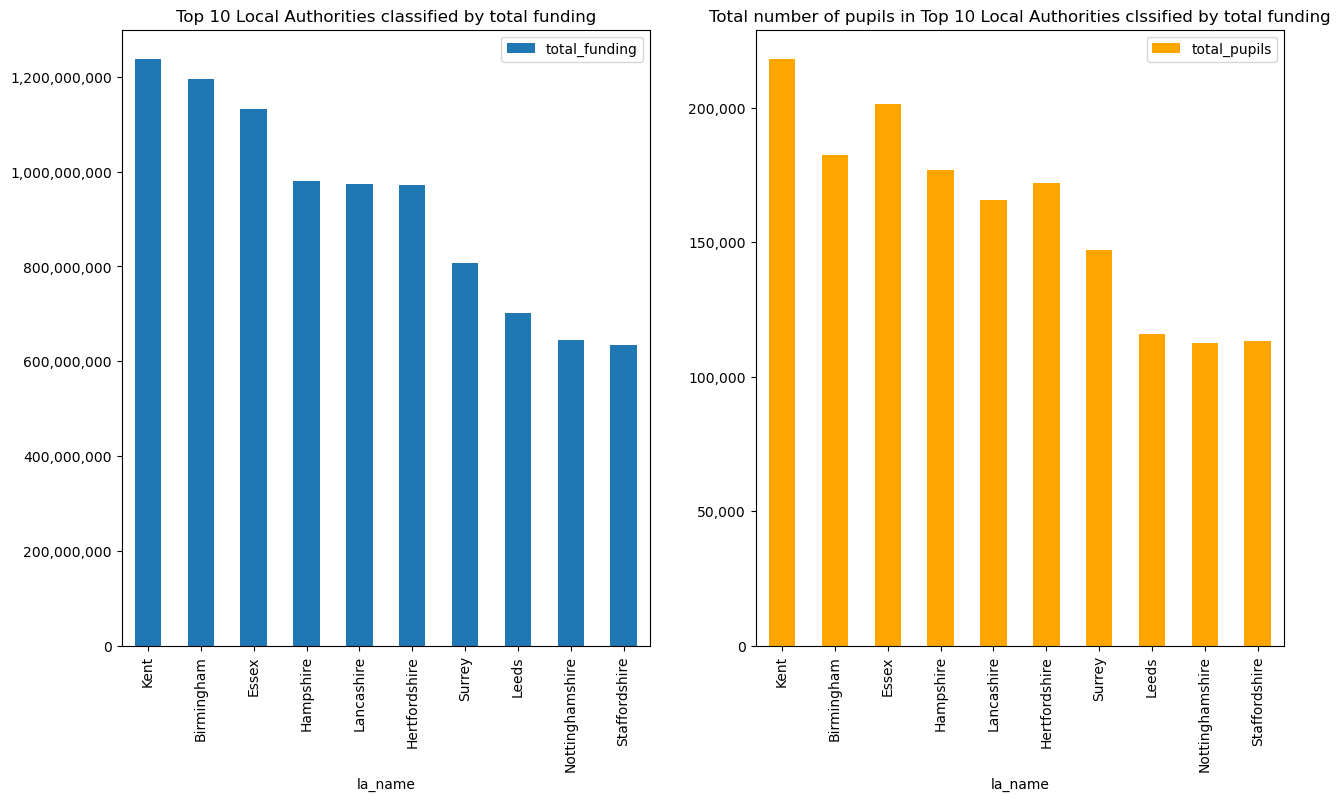

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))

fund_LA.plot(kind='bar',x='la_name',y='total_funding',ax=axes[0], title='Top 10 Local Authorities classified by total funding')
fund_LA.plot(kind='bar',x='la_name',y='total_pupils', ax=axes[1], color='orange',title='Total number of pupils in Top 10 Local Authorities clssified by total funding')

current_values_ax00 = axes[0].get_yticks()
axes[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values_ax00])

current_values_ax01 = axes[1].get_yticks()
axes[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values_ax01])


plt.show()

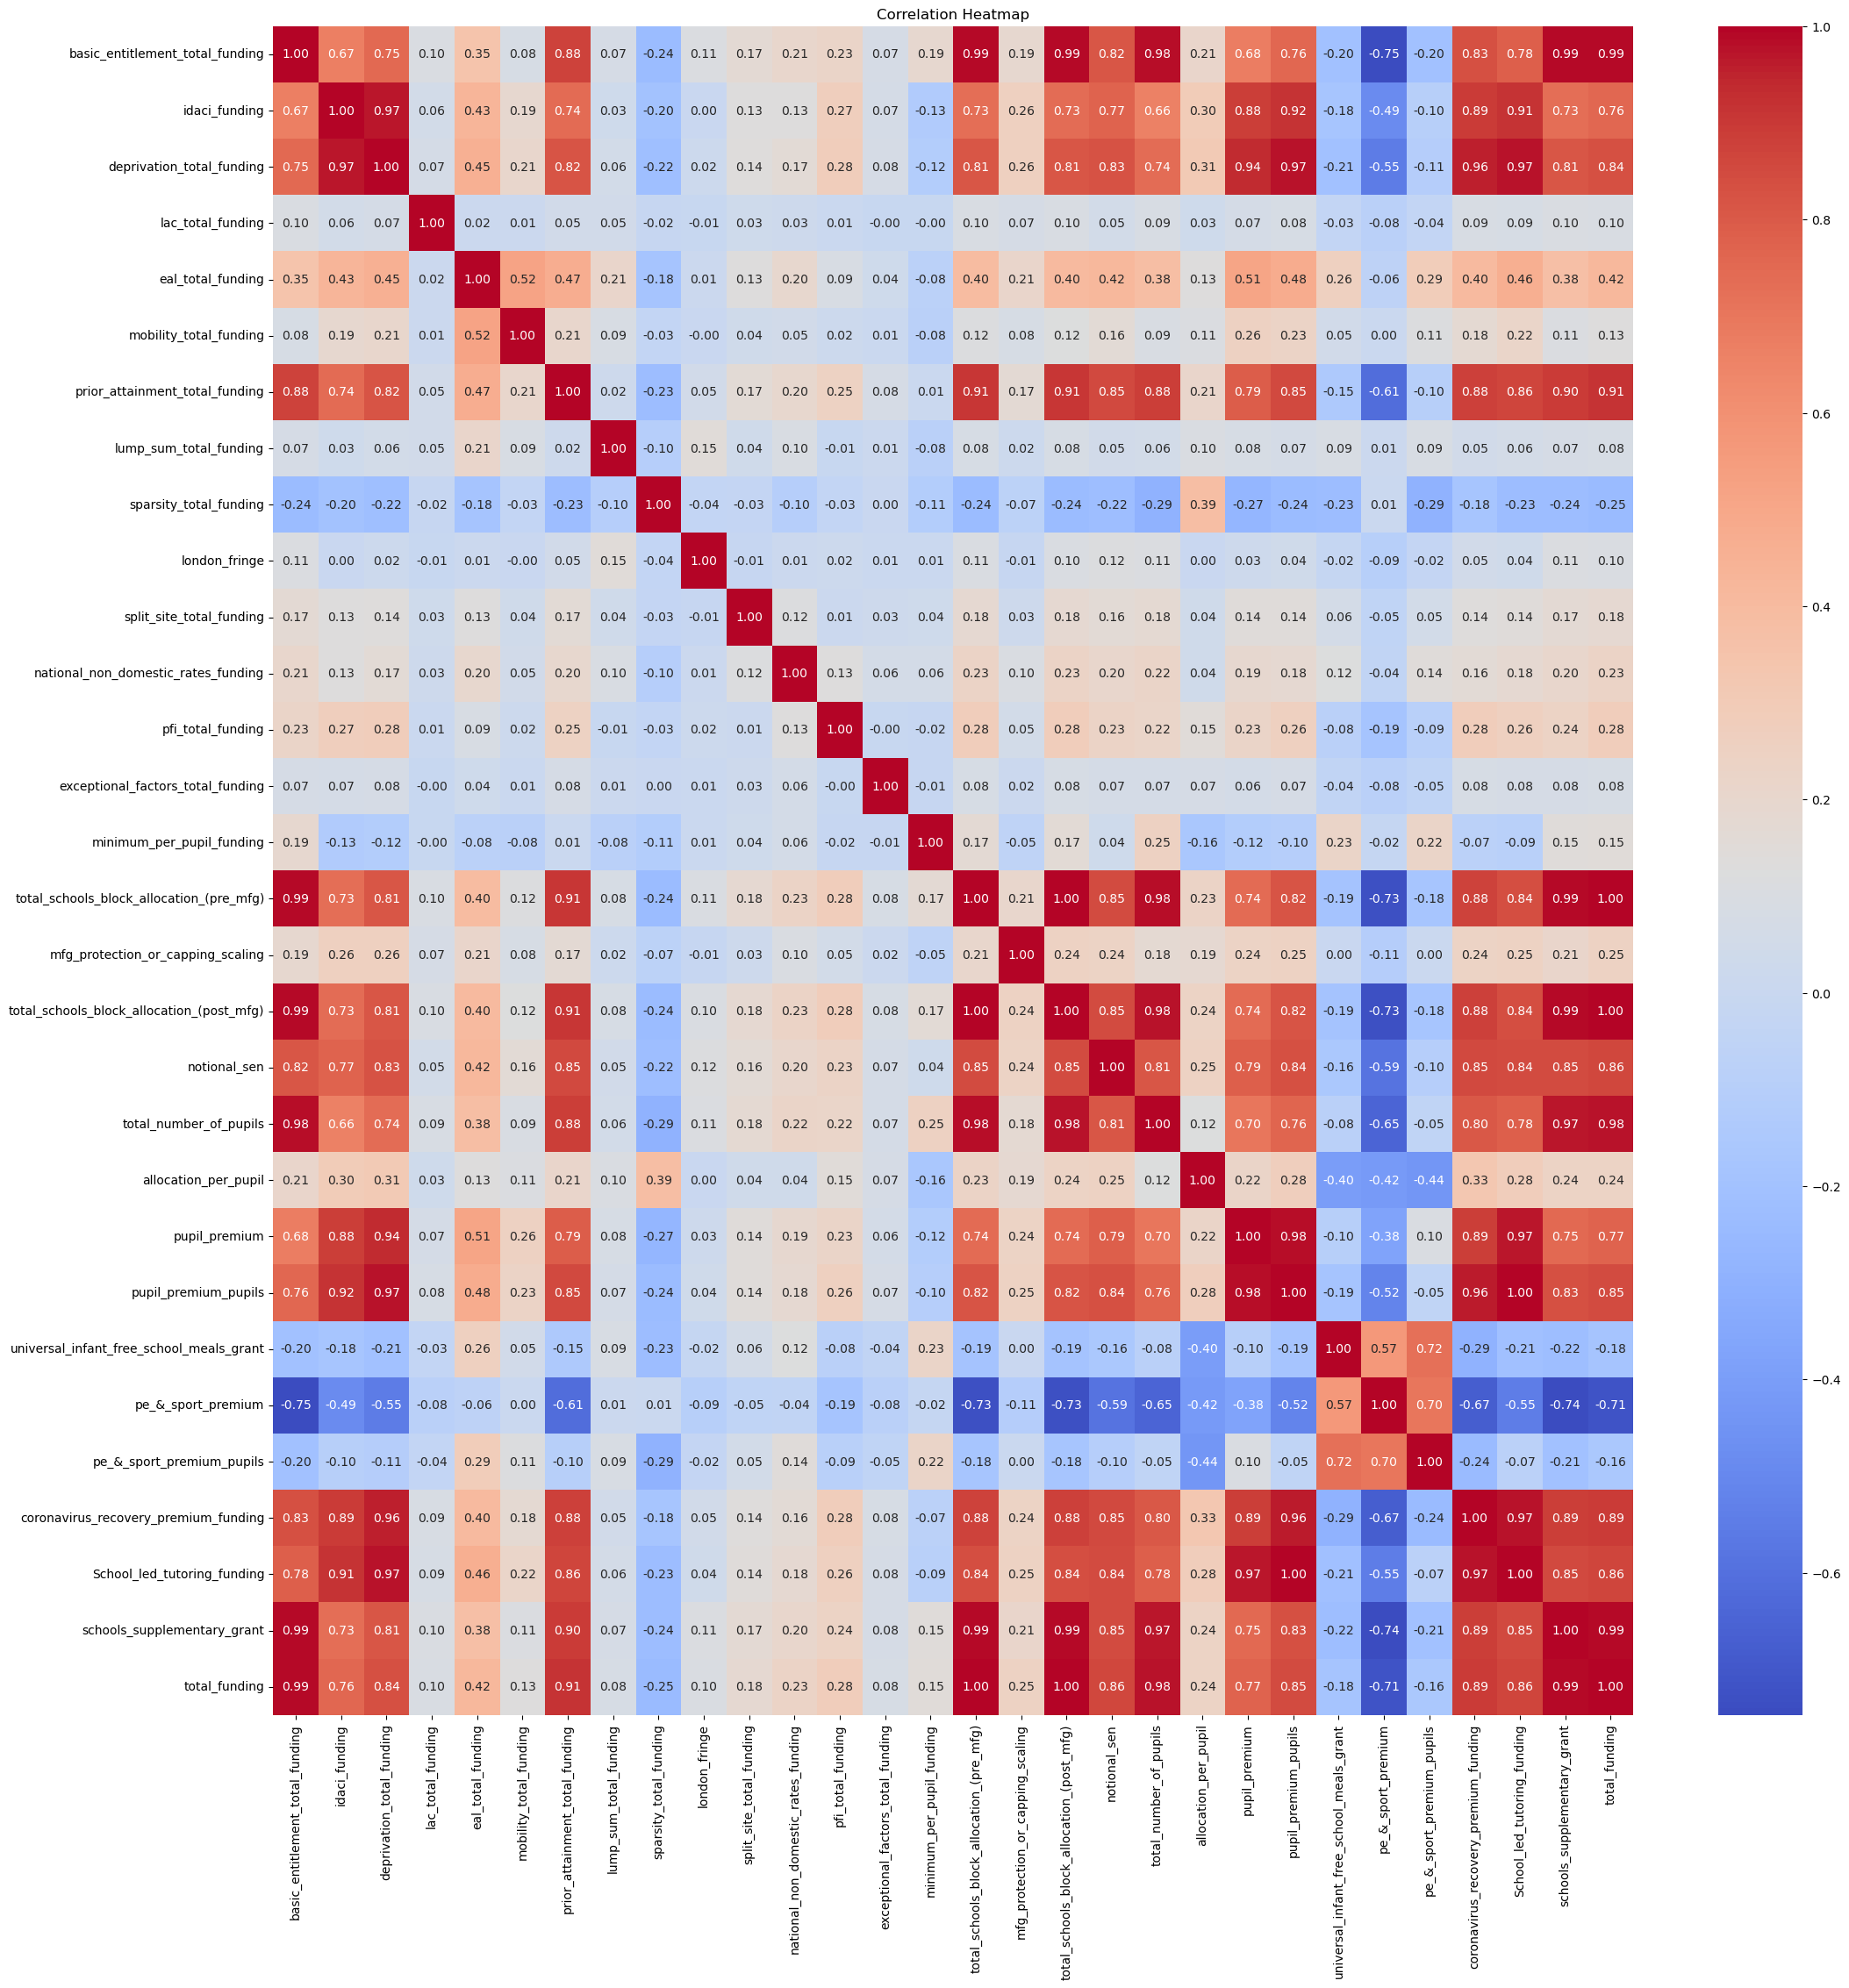

In [25]:
# Calculate the Pearson correlation coefficient
correlation = fund.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(25, 25))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# SCALED BEFORE K-PROTOTYPE

In [16]:
# divided numerical and categorical 

fund_categorical_col = list(range(0,5))
fund_num = fund.iloc[:,4:]
fund_cat = fund.iloc[:,0:4]

# StandardScaler

scaled_num = StandardScaler().fit_transform(fund_num)
scaled_num = pd.DataFrame(scaled_num, columns= fund_num.columns)

In [17]:
scaled_num

,basic_entitlement_total_funding,idaci_funding,deprivation_total_funding,lac_total_funding,eal_total_funding,mobility_total_funding,prior_attainment_total_funding,lump_sum_total_funding,sparsity_total_funding,london_fringe,...,allocation_per_pupil,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding
0,3.062023,4.253841,3.237796,-0.046876,0.850054,-0.305459,2.099336,0.864418,-0.326961,-0.122482,...,1.157866,1.585371,1.912214,-1.108197,-2.260849,-1.296884,2.139358,1.932899,3.150521,2.948104
1,5.168817,4.211660,4.399099,-0.046876,1.935856,-0.305459,4.119976,0.864418,-0.326961,-0.122482,...,1.286309,3.375938,3.846165,-1.108197,-2.260849,-1.296884,4.430175,3.904065,5.446900,5.227835
2,0.399915,0.900863,0.698434,-0.046876,3.410102,2.205087,0.722810,0.864418,-0.326961,-0.122482,...,0.244263,0.852684,0.544297,1.840381,0.790267,1.916998,0.073716,0.509619,0.359452,0.563127
3,0.087415,0.514468,0.327199,-0.046876,1.340476,0.843045,0.624282,0.864418,-0.326961,-0.122482,...,0.258828,0.360225,0.166941,0.810643,0.616506,1.113528,-0.062716,0.168338,0.054773,0.186591
4,3.236505,5.048351,4.922371,-0.046876,2.993077,0.781453,3.243229,0.864418,-0.326961,-0.122482,...,1.535747,3.537916,4.015976,-1.108197,-2.260849,-1.296884,4.980204,4.300441,3.785850,3.552563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,-0.546850,-0.646491,-0.750716,-0.046876,-0.575714,-0.305459,-0.563787,-0.367994,-0.326961,-0.122482,...,-0.736223,-0.994036,-0.870790,0.168086,0.348503,-0.125723,-0.610338,-0.831019,-0.603938,-0.632384
20173,-0.427112,-0.636564,-0.698903,-0.046876,-0.539754,-0.305459,-0.623143,-0.367994,-0.326961,-0.122482,...,-0.682241,-0.895544,-0.795318,0.335348,0.420658,0.207921,-0.610338,-0.739195,-0.498355,-0.495479
20174,-0.122694,-0.322067,-0.213218,-0.046876,-0.500671,-0.305459,0.087046,-0.367994,-0.326961,-0.122482,...,-0.770208,0.052438,-0.068907,0.775450,0.594418,1.011392,-0.245360,-0.087241,-0.126761,-0.134821
20175,-0.163283,-0.138755,-0.168781,-0.046876,-0.223657,-0.305459,0.019866,-0.367994,-0.326961,-0.122482,...,-0.645296,0.003193,-0.106643,1.470730,0.588528,0.984156,-0.255331,-0.096423,-0.177022,-0.146534


In [18]:
# concatenate scaled + categorical

cat_scaled = pd.concat([fund_cat,scaled_num],axis=1)

In [19]:
cat_scaled

,la_name,school_type,school_phase,academy,basic_entitlement_total_funding,idaci_funding,deprivation_total_funding,lac_total_funding,eal_total_funding,mobility_total_funding,...,allocation_per_pupil,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding
0,Barking and Dagenham,Voluntary aided school,Secondary,No,3.062023,4.253841,3.237796,-0.046876,0.850054,-0.305459,...,1.157866,1.585371,1.912214,-1.108197,-2.260849,-1.296884,2.139358,1.932899,3.150521,2.948104
1,Barking and Dagenham,Community school,Secondary,No,5.168817,4.211660,4.399099,-0.046876,1.935856,-0.305459,...,1.286309,3.375938,3.846165,-1.108197,-2.260849,-1.296884,4.430175,3.904065,5.446900,5.227835
2,Barking and Dagenham,Community school,Primary,No,0.399915,0.900863,0.698434,-0.046876,3.410102,2.205087,...,0.244263,0.852684,0.544297,1.840381,0.790267,1.916998,0.073716,0.509619,0.359452,0.563127
3,Barking and Dagenham,Community school,Primary,No,0.087415,0.514468,0.327199,-0.046876,1.340476,0.843045,...,0.258828,0.360225,0.166941,0.810643,0.616506,1.113528,-0.062716,0.168338,0.054773,0.186591
4,Barking and Dagenham,Voluntary controlled school,Secondary,No,3.236505,5.048351,4.922371,-0.046876,2.993077,0.781453,...,1.535747,3.537916,4.015976,-1.108197,-2.260849,-1.296884,4.980204,4.300441,3.785850,3.552563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,York,Academy converter,Primary,Yes,-0.546850,-0.646491,-0.750716,-0.046876,-0.575714,-0.305459,...,-0.736223,-0.994036,-0.870790,0.168086,0.348503,-0.125723,-0.610338,-0.831019,-0.603938,-0.632384
20173,York,Community school,Primary,No,-0.427112,-0.636564,-0.698903,-0.046876,-0.539754,-0.305459,...,-0.682241,-0.895544,-0.795318,0.335348,0.420658,0.207921,-0.610338,-0.739195,-0.498355,-0.495479
20174,York,Academy converter,Primary,Yes,-0.122694,-0.322067,-0.213218,-0.046876,-0.500671,-0.305459,...,-0.770208,0.052438,-0.068907,0.775450,0.594418,1.011392,-0.245360,-0.087241,-0.126761,-0.134821
20175,York,Community school,Primary,No,-0.163283,-0.138755,-0.168781,-0.046876,-0.223657,-0.305459,...,-0.645296,0.003193,-0.106643,1.470730,0.588528,0.984156,-0.255331,-0.096423,-0.177022,-0.146534


## CHECKING NUMBER OF K (ELBOW PLOT)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 618255.500000001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 618255.500000001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 618255.500000001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 618255.500000001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 618255.500000001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 618255.500000001
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 618255.500000001
Init: initializing c

Run: 2, iteration: 9/100, moves: 0, ncost: 386257.4779175516
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 12084, ncost: 439075.23109103297
Run: 3, iteration: 2/100, moves: 4096, ncost: 389063.36966761557
Run: 3, iteration: 3/100, moves: 1088, ncost: 386320.2154238306
Run: 3, iteration: 4/100, moves: 259, ncost: 386261.9959518967
Run: 3, iteration: 5/100, moves: 69, ncost: 386257.74344549107
Run: 3, iteration: 6/100, moves: 15, ncost: 386257.53303005744
Run: 3, iteration: 7/100, moves: 3, ncost: 386257.5218172548
Run: 3, iteration: 8/100, moves: 1, ncost: 386257.5203845962
Run: 3, iteration: 9/100, moves: 0, ncost: 386257.5203845962
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 8603, ncost: 393286.24316720635
Run: 4, iteration: 2/100, moves: 1403, ncost: 388039.71892542276
Run: 4, iteration: 3/100, moves: 950, ncost: 386756.18942821596
Run: 4, iteration:

Run: 5, iteration: 7/100, moves: 111, ncost: 363345.25447800616
Run: 5, iteration: 8/100, moves: 89, ncost: 363333.99912534584
Run: 5, iteration: 9/100, moves: 63, ncost: 363328.3255121668
Run: 5, iteration: 10/100, moves: 37, ncost: 363326.5258530745
Run: 5, iteration: 11/100, moves: 31, ncost: 363324.7285699974
Run: 5, iteration: 12/100, moves: 32, ncost: 363323.4035990739
Run: 5, iteration: 13/100, moves: 18, ncost: 363322.9227284864
Run: 5, iteration: 14/100, moves: 13, ncost: 363322.6686028809
Run: 5, iteration: 15/100, moves: 20, ncost: 363322.11683975486
Run: 5, iteration: 16/100, moves: 21, ncost: 363321.604312813
Run: 5, iteration: 17/100, moves: 20, ncost: 363321.12253380875
Run: 5, iteration: 18/100, moves: 15, ncost: 363320.81802602083
Run: 5, iteration: 19/100, moves: 42, ncost: 363288.7077912148
Run: 5, iteration: 20/100, moves: 113, ncost: 363283.2923677476
Run: 5, iteration: 21/100, moves: 16, ncost: 363282.90849259956
Run: 5, iteration: 22/100, moves: 14, ncost: 363282

Run: 2, iteration: 6/100, moves: 639, ncost: 338351.99001706386
Run: 2, iteration: 7/100, moves: 338, ncost: 338240.579956731
Run: 2, iteration: 8/100, moves: 198, ncost: 338193.06275751826
Run: 2, iteration: 9/100, moves: 147, ncost: 338169.1516372898
Run: 2, iteration: 10/100, moves: 117, ncost: 338152.1757079928
Run: 2, iteration: 11/100, moves: 149, ncost: 338131.0757753416
Run: 2, iteration: 12/100, moves: 122, ncost: 338116.0811739384
Run: 2, iteration: 13/100, moves: 96, ncost: 338105.617488053
Run: 2, iteration: 14/100, moves: 67, ncost: 338100.5615232989
Run: 2, iteration: 15/100, moves: 42, ncost: 338098.897959072
Run: 2, iteration: 16/100, moves: 24, ncost: 338098.2915343809
Run: 2, iteration: 17/100, moves: 18, ncost: 338097.9440660977
Run: 2, iteration: 18/100, moves: 7, ncost: 338097.883983765
Run: 2, iteration: 19/100, moves: 8, ncost: 338097.7979519132
Run: 2, iteration: 20/100, moves: 7, ncost: 338097.72054389835
Run: 2, iteration: 21/100, moves: 5, ncost: 338097.67387

Run: 10, iteration: 10/100, moves: 0, ncost: 340260.5100781599
Best run was number 6
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6093, ncost: 339914.3542456043
Run: 1, iteration: 2/100, moves: 1761, ncost: 337988.10814422346
Run: 1, iteration: 3/100, moves: 775, ncost: 337591.0236575394
Run: 1, iteration: 4/100, moves: 388, ncost: 337457.7018021132
Run: 1, iteration: 5/100, moves: 233, ncost: 337410.647046246
Run: 1, iteration: 6/100, moves: 161, ncost: 337385.35957925743
Run: 1, iteration: 7/100, moves: 119, ncost: 337368.5126267411
Run: 1, iteration: 8/100, moves: 81, ncost: 337358.469694145
Run: 1, iteration: 9/100, moves: 65, ncost: 337353.6332413141
Run: 1, iteration: 10/100, moves: 38, ncost: 337351.7464857035
Run: 1, iteration: 11/100, moves: 26, ncost: 337351.02823356976
Run: 1, iteration: 12/100, moves: 11, ncost: 337350.9194087246
Run: 1, iteration: 13/100, moves: 5, ncost: 337350.79162521614
Run: 1, iterati

Run: 8, iteration: 26/100, moves: 7, ncost: 315819.121166992
Run: 8, iteration: 27/100, moves: 16, ncost: 315818.61717845866
Run: 8, iteration: 28/100, moves: 19, ncost: 315817.7629488022
Run: 8, iteration: 29/100, moves: 26, ncost: 315816.7686715198
Run: 8, iteration: 30/100, moves: 14, ncost: 315816.38122464204
Run: 8, iteration: 31/100, moves: 6, ncost: 315816.3017580496
Run: 8, iteration: 32/100, moves: 9, ncost: 315815.98460596305
Run: 8, iteration: 33/100, moves: 11, ncost: 315815.85241657804
Run: 8, iteration: 34/100, moves: 10, ncost: 315815.71181202395
Run: 8, iteration: 35/100, moves: 1, ncost: 315815.68228869356
Run: 8, iteration: 36/100, moves: 0, ncost: 315815.68228869356
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 5482, ncost: 350409.38478289597
Run: 9, iteration: 2/100, moves: 2098, ncost: 344643.76308968314
Run: 9, iteration: 3/100, moves: 823, ncost: 343267.6554927289
Run: 9, iteration: 4/100, moves: 

Run: 3, iteration: 39/100, moves: 27, ncost: 300484.14574550604
Run: 3, iteration: 40/100, moves: 26, ncost: 300483.0828433652
Run: 3, iteration: 41/100, moves: 18, ncost: 300482.5700050116
Run: 3, iteration: 42/100, moves: 11, ncost: 300482.22066842974
Run: 3, iteration: 43/100, moves: 9, ncost: 300482.08402317134
Run: 3, iteration: 44/100, moves: 10, ncost: 300481.9779621067
Run: 3, iteration: 45/100, moves: 5, ncost: 300481.9019763655
Run: 3, iteration: 46/100, moves: 2, ncost: 300481.8893360217
Run: 3, iteration: 47/100, moves: 0, ncost: 300481.8893360217
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 4161, ncost: 322858.5829905804
Run: 4, iteration: 2/100, moves: 1978, ncost: 311384.8250559147
Run: 4, iteration: 3/100, moves: 737, ncost: 310283.1894169525
Run: 4, iteration: 4/100, moves: 269, ncost: 310132.5789807505
Run: 4, iteration: 5/100, moves: 123, ncost: 310109.09975527984
Run: 4, iteration: 6/100, moves: 43,

Run: 8, iteration: 25/100, moves: 23, ncost: 306361.6476724051
Run: 8, iteration: 26/100, moves: 17, ncost: 306360.99372449407
Run: 8, iteration: 27/100, moves: 11, ncost: 306360.57119601505
Run: 8, iteration: 28/100, moves: 4, ncost: 306360.5159914849
Run: 8, iteration: 29/100, moves: 1, ncost: 306360.51295193913
Run: 8, iteration: 30/100, moves: 0, ncost: 306360.51295193913
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 8082, ncost: 319403.89496151253
Run: 9, iteration: 2/100, moves: 2355, ncost: 311573.3219073147
Run: 9, iteration: 3/100, moves: 872, ncost: 309514.46605400543
Run: 9, iteration: 4/100, moves: 458, ncost: 308670.4491753458
Run: 9, iteration: 5/100, moves: 451, ncost: 308034.7017642263
Run: 9, iteration: 6/100, moves: 470, ncost: 307570.0602834331
Run: 9, iteration: 7/100, moves: 509, ncost: 307084.19626687665
Run: 9, iteration: 8/100, moves: 571, ncost: 306596.0284278266
Run: 9, iteration: 9/100, moves:

Run: 4, iteration: 16/100, moves: 0, ncost: 297550.19961986406
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 6799, ncost: 298161.3956664227
Run: 5, iteration: 2/100, moves: 1616, ncost: 294768.05719288555
Run: 5, iteration: 3/100, moves: 512, ncost: 294211.3785527007
Run: 5, iteration: 4/100, moves: 445, ncost: 293904.8132225309
Run: 5, iteration: 5/100, moves: 323, ncost: 293774.307536102
Run: 5, iteration: 6/100, moves: 251, ncost: 293698.98037472944
Run: 5, iteration: 7/100, moves: 314, ncost: 293584.3113485622
Run: 5, iteration: 8/100, moves: 214, ncost: 293529.14060243126
Run: 5, iteration: 9/100, moves: 176, ncost: 293494.0640041871
Run: 5, iteration: 10/100, moves: 143, ncost: 293470.5665148343
Run: 5, iteration: 11/100, moves: 113, ncost: 293455.31037244154
Run: 5, iteration: 12/100, moves: 73, ncost: 293450.41083683044
Run: 5, iteration: 13/100, moves: 47, ncost: 293445.61325565545
Run: 5, iteration: 14/100, mo

Run: 1, iteration: 18/100, moves: 3, ncost: 286664.79475449317
Run: 1, iteration: 19/100, moves: 0, ncost: 286664.79475449317
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 11427, ncost: 295373.30319249566
Run: 2, iteration: 2/100, moves: 2143, ncost: 288786.5082335586
Run: 2, iteration: 3/100, moves: 915, ncost: 287137.31425381347
Run: 2, iteration: 4/100, moves: 281, ncost: 286933.57845145324
Run: 2, iteration: 5/100, moves: 93, ncost: 286858.5444624614
Run: 2, iteration: 6/100, moves: 40, ncost: 286842.92951881385
Run: 2, iteration: 7/100, moves: 36, ncost: 286836.6033711402
Run: 2, iteration: 8/100, moves: 54, ncost: 286829.99538337026
Run: 2, iteration: 9/100, moves: 37, ncost: 286823.1675717583
Run: 2, iteration: 10/100, moves: 35, ncost: 286819.5860269264
Run: 2, iteration: 11/100, moves: 15, ncost: 286818.8920212882
Run: 2, iteration: 12/100, moves: 20, ncost: 286817.99789887737
Run: 2, iteration: 13/100, moves: 

Run: 5, iteration: 31/100, moves: 167, ncost: 284777.0245372678
Run: 5, iteration: 32/100, moves: 65, ncost: 284773.29665897234
Run: 5, iteration: 33/100, moves: 48, ncost: 284771.0315912524
Run: 5, iteration: 34/100, moves: 23, ncost: 284770.3287059312
Run: 5, iteration: 35/100, moves: 7, ncost: 284770.26783038396
Run: 5, iteration: 36/100, moves: 4, ncost: 284770.2274327027
Run: 5, iteration: 37/100, moves: 0, ncost: 284770.2274327027
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 5458, ncost: 291817.18837238016
Run: 6, iteration: 2/100, moves: 2749, ncost: 286633.36011297395
Run: 6, iteration: 3/100, moves: 1135, ncost: 283787.7937755889
Run: 6, iteration: 4/100, moves: 820, ncost: 282453.7346802055
Run: 6, iteration: 5/100, moves: 712, ncost: 281698.0865496028
Run: 6, iteration: 6/100, moves: 661, ncost: 281005.2970306723
Run: 6, iteration: 7/100, moves: 567, ncost: 280571.25848515093
Run: 6, iteration: 8/100, moves:

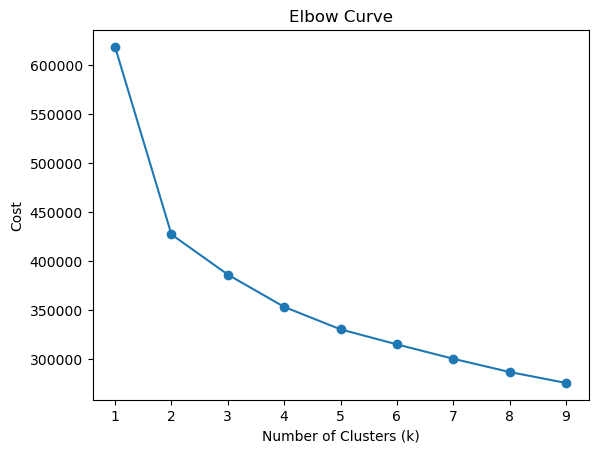

In [22]:
no_clusters = range(1,10)
costs = {}
for k in no_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', verbose=2, n_init=10)
    kproto_test = kproto.fit_predict(cat_scaled, categorical=fund_categorical_col)
    
    costs[k] = kproto.cost_
    
print('Sum distance (Cost) of candidate k')
for keys, values in costs.items():
    print(keys,':',f'{values:.3f}')
          
plt.plot(costs.keys() , costs.values(), marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.show()

In [33]:
# KneeLocator class will detect elbows if curve is convex; if voncave will detect knees
# Knee is an indicator for optimum k

from kneed import KneeLocator 
knee_cost = KneeLocator(
    x = list(costs.keys()), 
    y = list(costs.values()),
    S=0.1, curve = 'convex' , direction='decreasing',online=True)
K_cost = knee_cost.elbow
print('elbow at k=',f'{K_cost:.0f} clusters')


elbow at k= 2 clusters


In [32]:
# try k=2
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=2, n_init=10)
kproto_cluster = kproto.fit_predict(cat_scaled, categorical = fund_categorical_col)

fund['Cluster'] = kproto_cluster

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7217, ncost: 515948.9262587545
Run: 1, iteration: 2/100, moves: 6178, ncost: 438822.9163720729
Run: 1, iteration: 3/100, moves: 1333, ncost: 427750.5059822312
Run: 1, iteration: 4/100, moves: 264, ncost: 427184.3819610974
Run: 1, iteration: 5/100, moves: 39, ncost: 427172.84624782257
Run: 1, iteration: 6/100, moves: 1, ncost: 427172.8173844817
Run: 1, iteration: 7/100, moves: 1, ncost: 427172.80239183636
Run: 1, iteration: 8/100, moves: 0, ncost: 427172.80239183636
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1978, ncost: 428886.51708386175
Run: 2, iteration: 2/100, moves: 462, ncost: 427225.0917309586
Run: 2, iteration: 3/100, moves: 75, ncost: 427173.9593564182
Run: 2, iteration: 4/100, moves: 12, ncost: 427172.84624782245
Run: 2, iteration: 5/100, moves: 1, ncost: 427172.81738448155
Run: 2, iteration: 6/1

In [130]:
fund['Cluster'].value_counts()

1    17272
0     2905
Name: Cluster, dtype: int64

In [38]:
fund[fund["Cluster"]==0].describe().T

,count,mean,std,min,25%,50%,75%,max
basic_entitlement_total_funding,2905.0,4.837682e+06,1.446463e+06,6434.000000,3.843259e+06,4.756032e+06,5.766480e+06,13551855.0
idaci_funding,2905.0,2.441661e+05,1.800244e+05,0.000000,1.016920e+05,2.136070e+05,3.474200e+05,1082605.0
deprivation_total_funding,2905.0,5.992631e+05,3.442681e+05,0.000000,3.393790e+05,5.342100e+05,7.867500e+05,2070208.0
lac_total_funding,2905.0,1.111876e+02,9.687056e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,21000.0
eal_total_funding,2905.0,4.309412e+04,5.915877e+04,0.000000,7.650000e+03,2.085900e+04,5.355000e+04,612572.0
mobility_total_funding,2905.0,3.787994e+03,1.402751e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,182521.0
prior_attainment_total_funding,2905.0,3.848957e+05,1.573661e+05,0.000000,2.884870e+05,3.674440e+05,4.633270e+05,1630376.0
lump_sum_total_funding,2905.0,1.271312e+05,1.653572e+04,0.000000,1.213000e+05,1.213000e+05,1.276200e+05,175000.0
sparsity_total_funding,2905.0,1.256454e+02,2.182224e+03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,80000.0
london_fringe,2905.0,4.453859e+03,2.642250e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,475956.0


In [39]:
fund[fund["Cluster"]==1].describe().T

,count,mean,std,min,25%,50%,75%,max
basic_entitlement_total_funding,17272.0,9.130139e+05,604900.340349,0.0,537431.00000,7.206080e+05,1.256746e+06,5.110743e+06
idaci_funding,17272.0,4.109643e+04,49401.840631,0.0,3388.50000,2.144800e+04,6.339225e+04,3.115150e+05
deprivation_total_funding,17272.0,1.081250e+05,104186.901144,0.0,27415.50000,7.355000e+04,1.582032e+05,7.253500e+05
lac_total_funding,17272.0,2.894859e+00,149.081929,0.0,0.00000,0.000000e+00,0.000000e+00,1.100000e+04
eal_total_funding,17272.0,1.644766e+04,27559.668461,0.0,1248.75000,5.146000e+03,1.937875e+04,3.121030e+05
mobility_total_funding,17272.0,1.906241e+03,5074.841723,0.0,0.00000,0.000000e+00,1.018000e+03,1.013250e+05
prior_attainment_total_funding,17272.0,8.259655e+04,57625.371584,0.0,40680.00000,6.854950e+04,1.118898e+05,4.583280e+05
lump_sum_total_funding,17272.0,1.259111e+05,12307.884565,50542.0,121300.00000,1.213000e+05,1.239930e+05,1.750000e+05
sparsity_total_funding,17272.0,5.171881e+03,14542.523770,0.0,0.00000,0.000000e+00,0.000000e+00,1.000000e+05
london_fringe,17272.0,9.348447e+02,6530.344262,0.0,0.00000,0.000000e+00,0.000000e+00,1.542480e+05


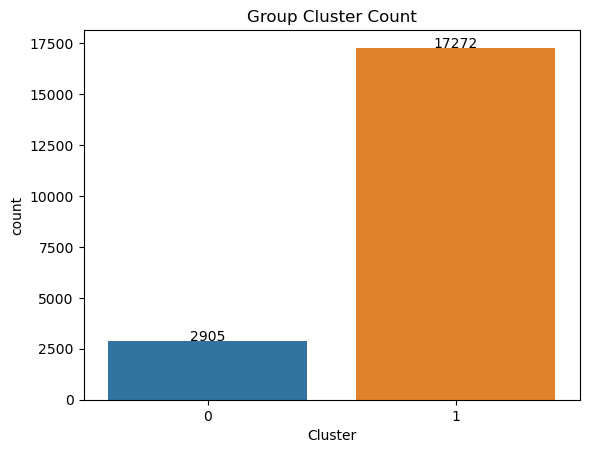

In [102]:
ax=sns.countplot(x=fund.Cluster)
for index, row in pd.DataFrame(fund['Cluster'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
plt.title('Group Cluster Count')
plt.show()

In [48]:
fund_copy = fund.copy()

In [133]:
def cluster_results(df):
    result_df = df.groupby('Cluster').agg({
        'Cluster' :lambda x: x.value_counts(),
        'la_name' :lambda x: x.value_counts().index[0],
        'school_type' :lambda x: x.value_counts().index[0],
        'school_phase' :lambda x:x.value_counts().index[0],
        'academy' :lambda x:x.value_counts().index[0],
        'basic_entitlement_total_funding': 'mean',
        'idaci_funding' : 'mean',
        'deprivation_total_funding' : 'mean',
        'lac_total_funding' : 'mean',
        'eal_total_funding' : 'mean',
        'mobility_total_funding' : 'mean',
        'prior_attainment_total_funding' : 'mean',
        'lump_sum_total_funding' : 'mean',
        'sparsity_total_funding' : 'mean',
        'london_fringe' : 'mean',
        'split_site_total_funding' :'mean',
        'national_non_domestic_rates_funding' :'mean',
        'pfi_total_funding' : 'mean',
        'exceptional_factors_total_funding' : 'mean',
        'minimum_per_pupil_funding' : 'mean',
        'total_schools_block_allocation_(pre_mfg)' :'mean',
        'mfg_protection_or_capping_scaling' : 'mean',
        'total_schools_block_allocation_(post_mfg)' :'mean',
        'notional_sen' :'mean',
        'total_number_of_pupils' :'mean',
        'allocation_per_pupil' :'mean',
        'pupil_premium' :'mean',
        'universal_infant_free_school_meals_grant': 'mean',
        'pe_&_sport_premium' :'mean',
        'pe_&_sport_premium_pupils' :'mean',
        'coronavirus_recovery_premium_funding' :'mean',
        'School_led_tutoring_funding' :'mean',
        'schools_supplementary_grant' :'mean',
        'total_funding' : 'mean'
    
    }).round(2)

    return result_df

In [134]:
cluster_results(fund_copy).T

Cluster,0,1
Cluster,2905,17272
la_name,Birmingham,Lancashire
school_type,Academy converter,Community school
school_phase,Secondary,Primary
academy,Yes,No
basic_entitlement_total_funding,4837682.42,913013.89
idaci_funding,244166.12,41096.43
deprivation_total_funding,599263.05,108125.02
lac_total_funding,111.19,2.89
eal_total_funding,43094.12,16447.66


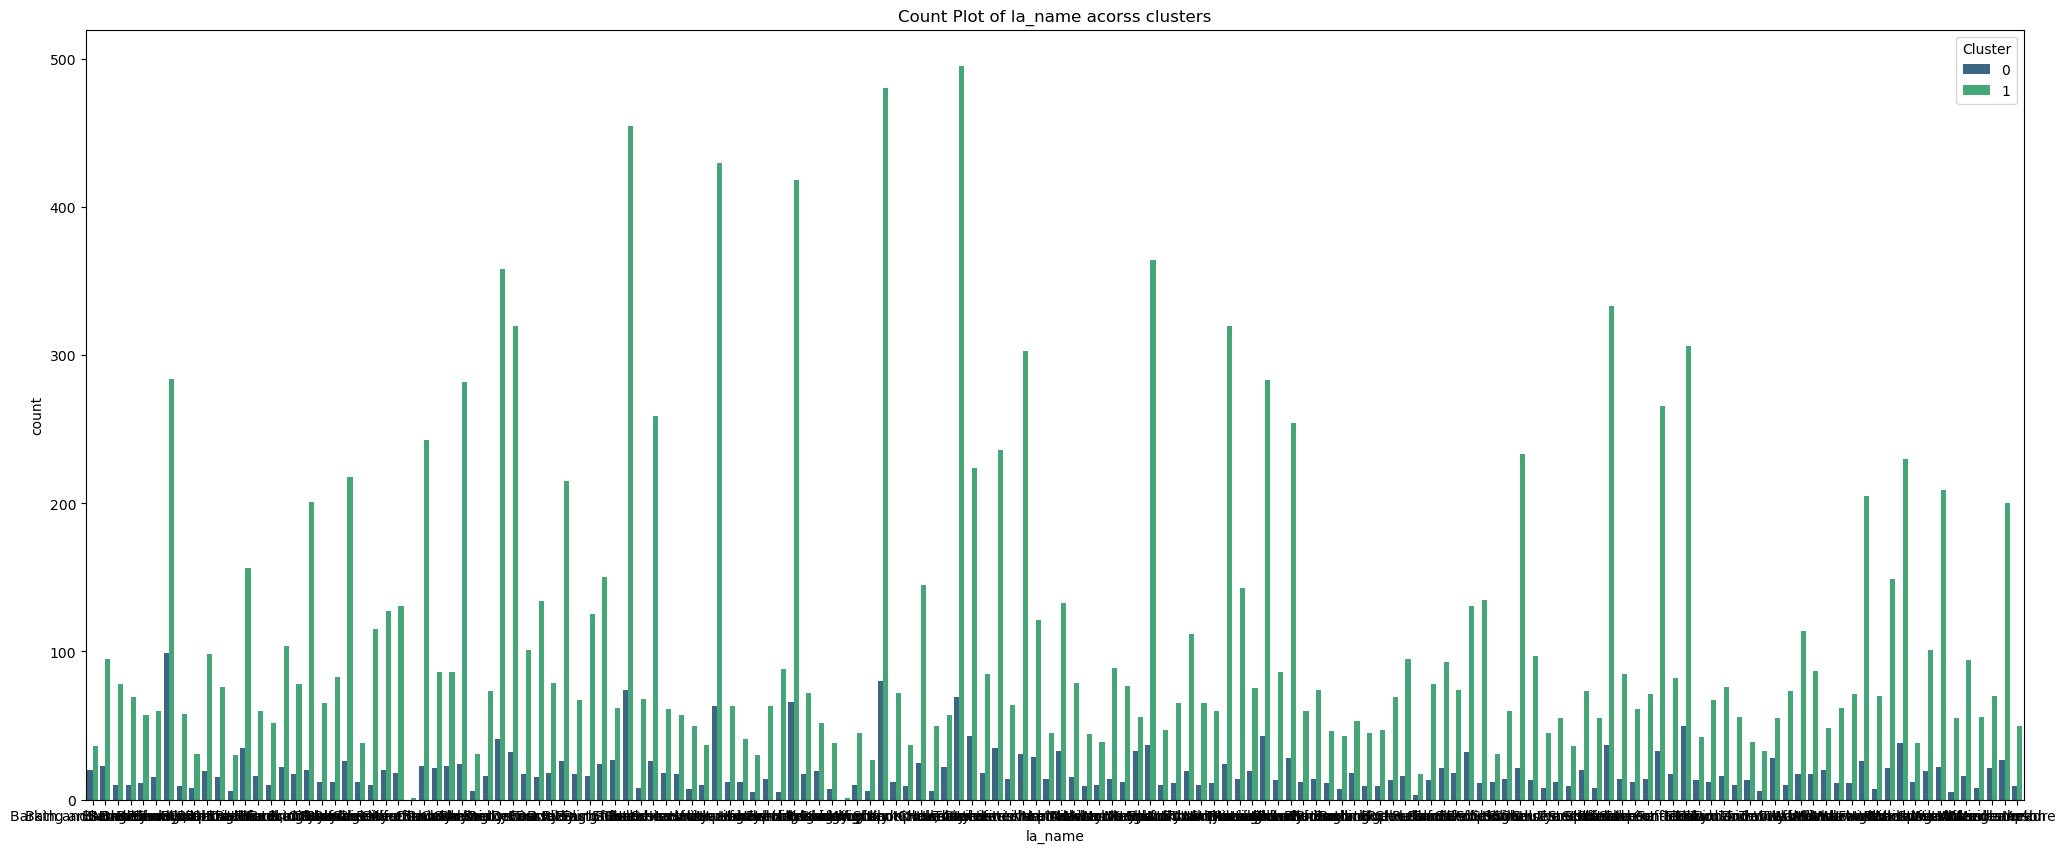

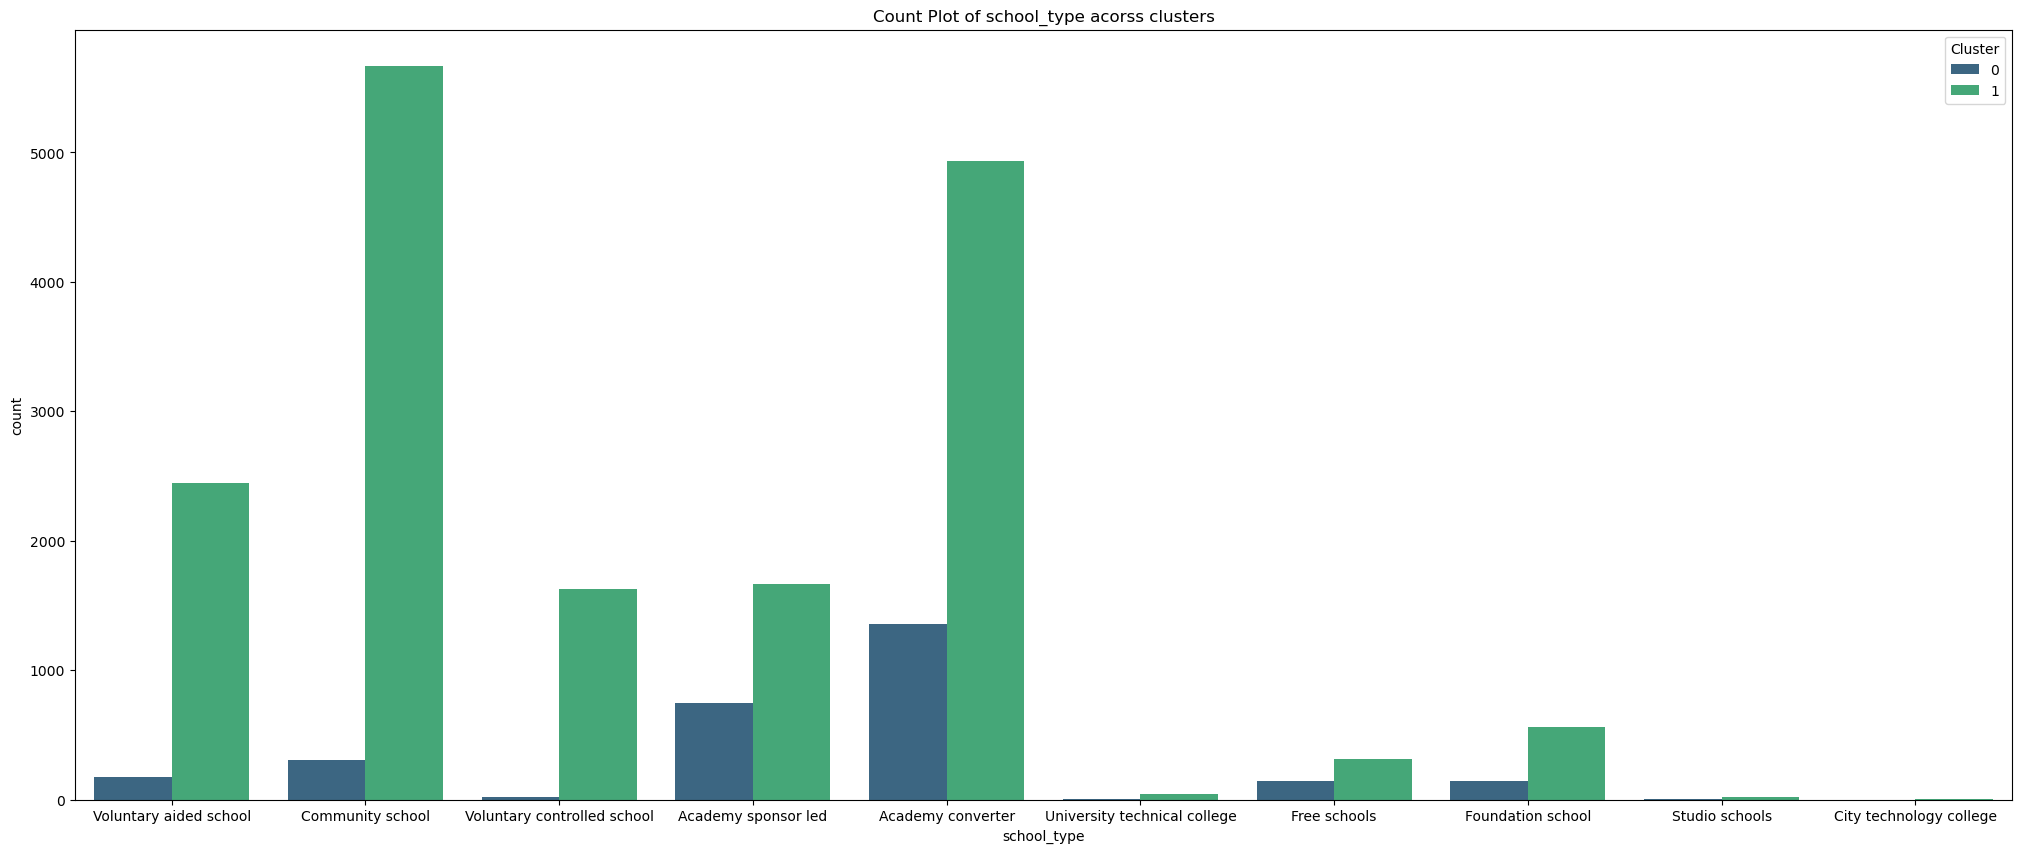

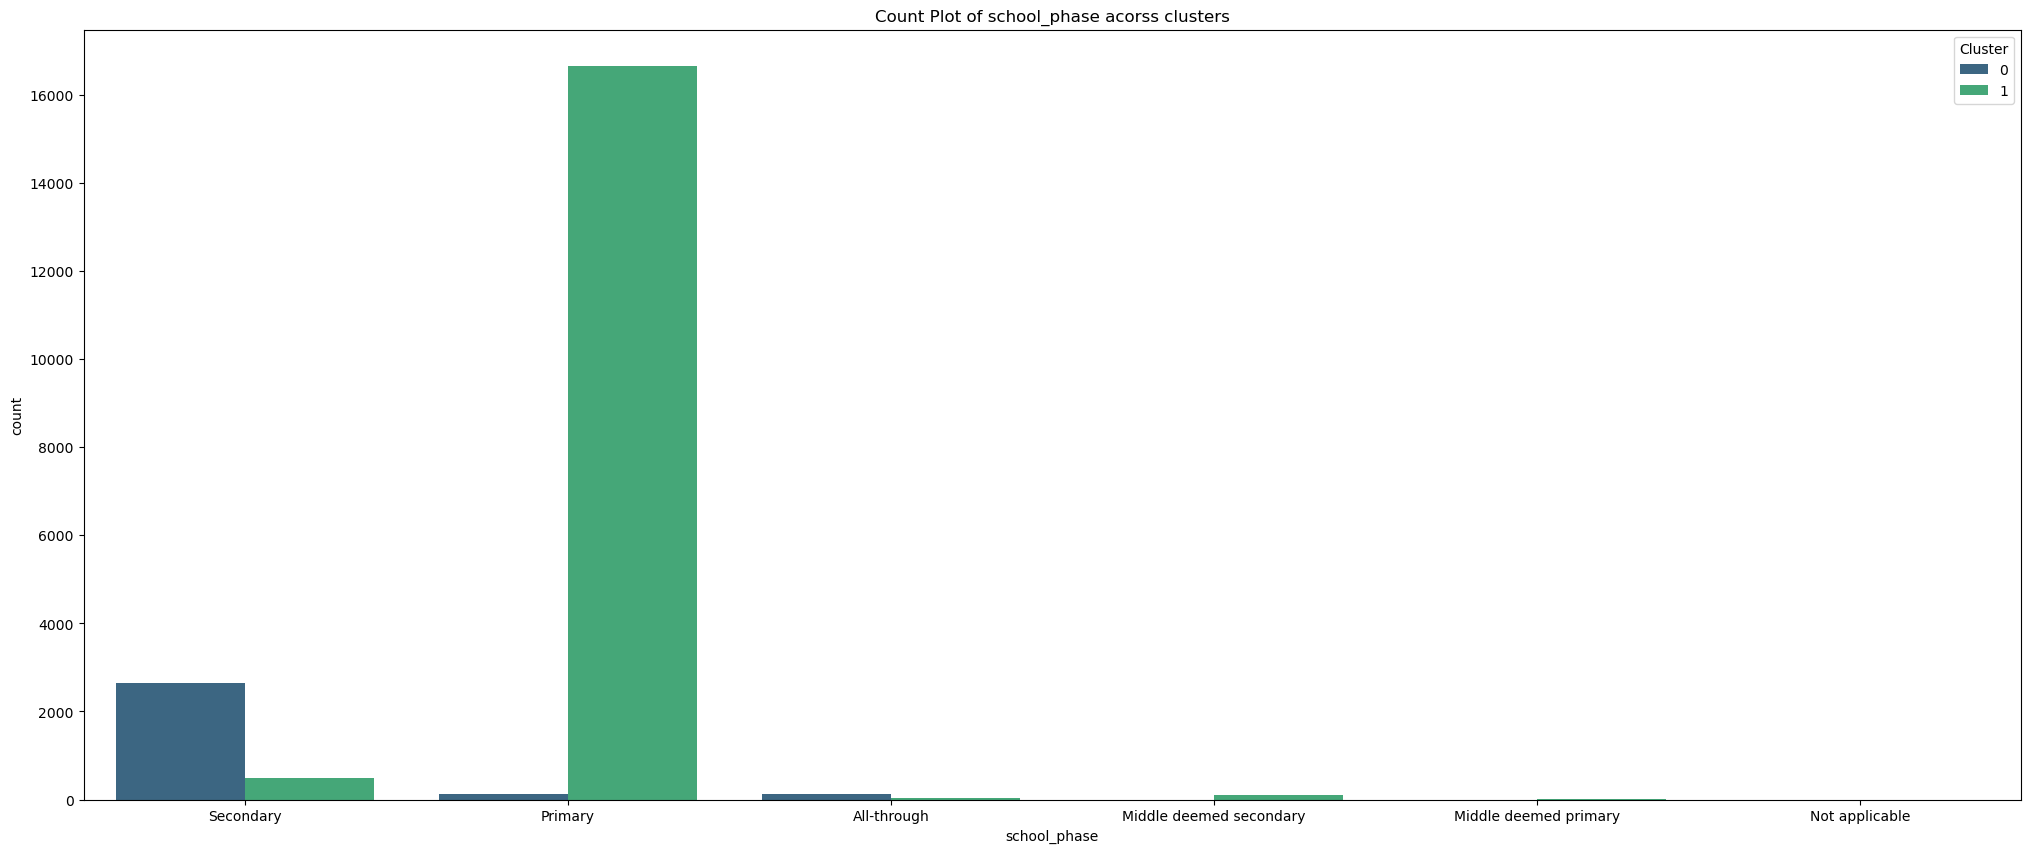

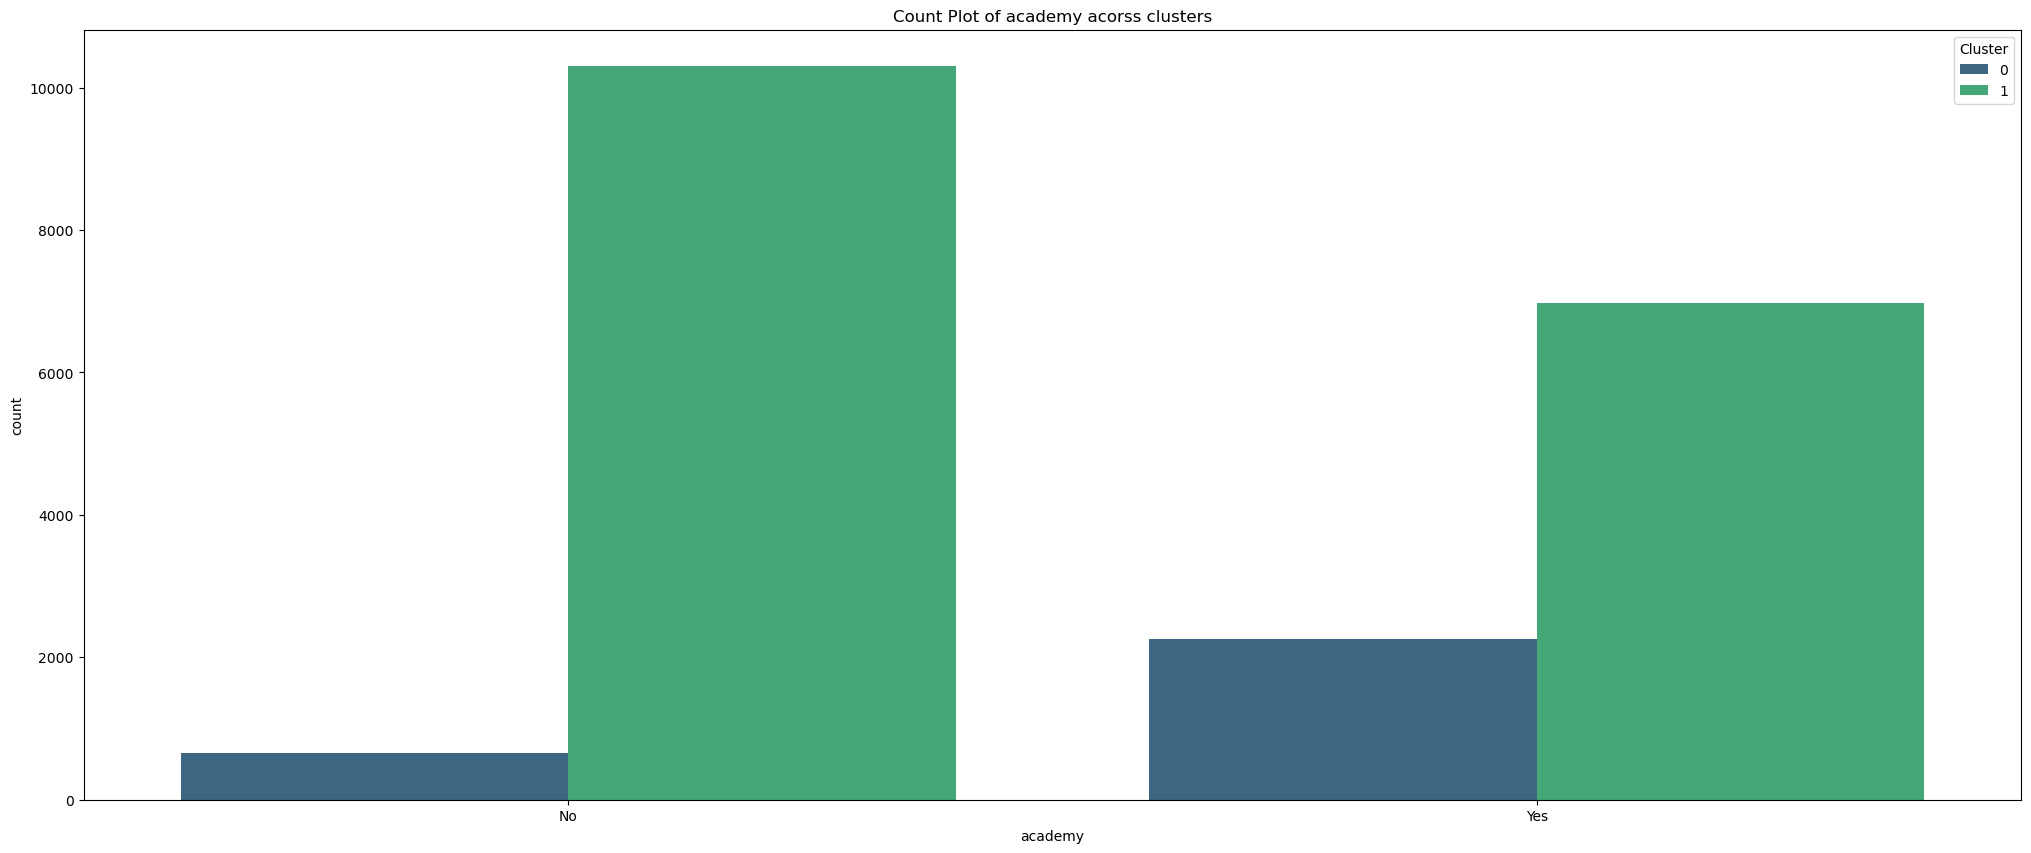

In [198]:
for cat_feature in list(fund_cat.columns):
    plt.figure(figsize = (25,10))
    sns.countplot(x=cat_feature, hue='Cluster', data=fund, palette='viridis')
    plt.title(f'Count Plot of {cat_feature} acorss clusters')
    plt.show()

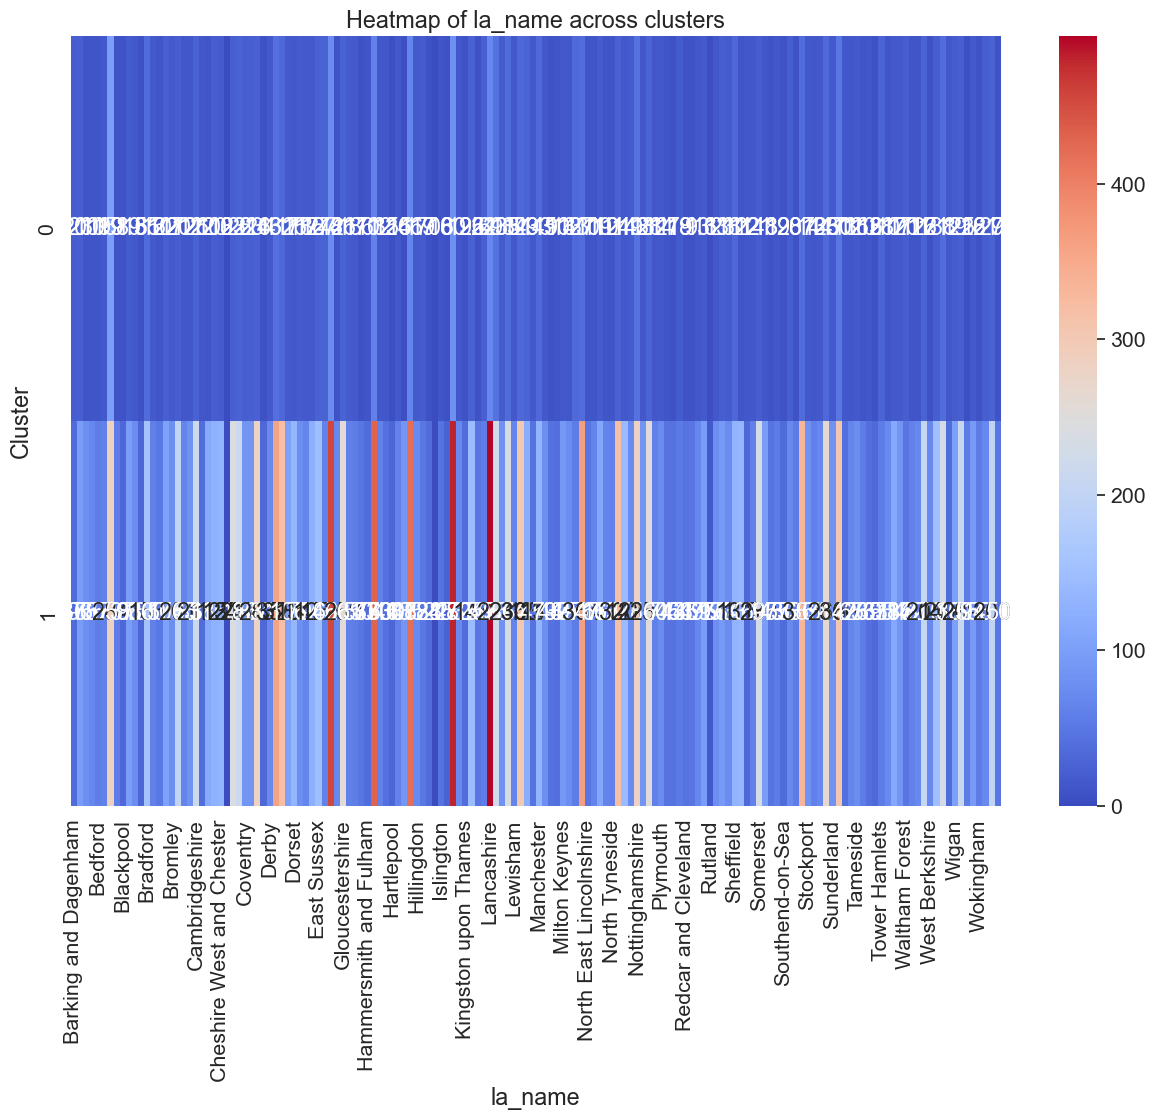

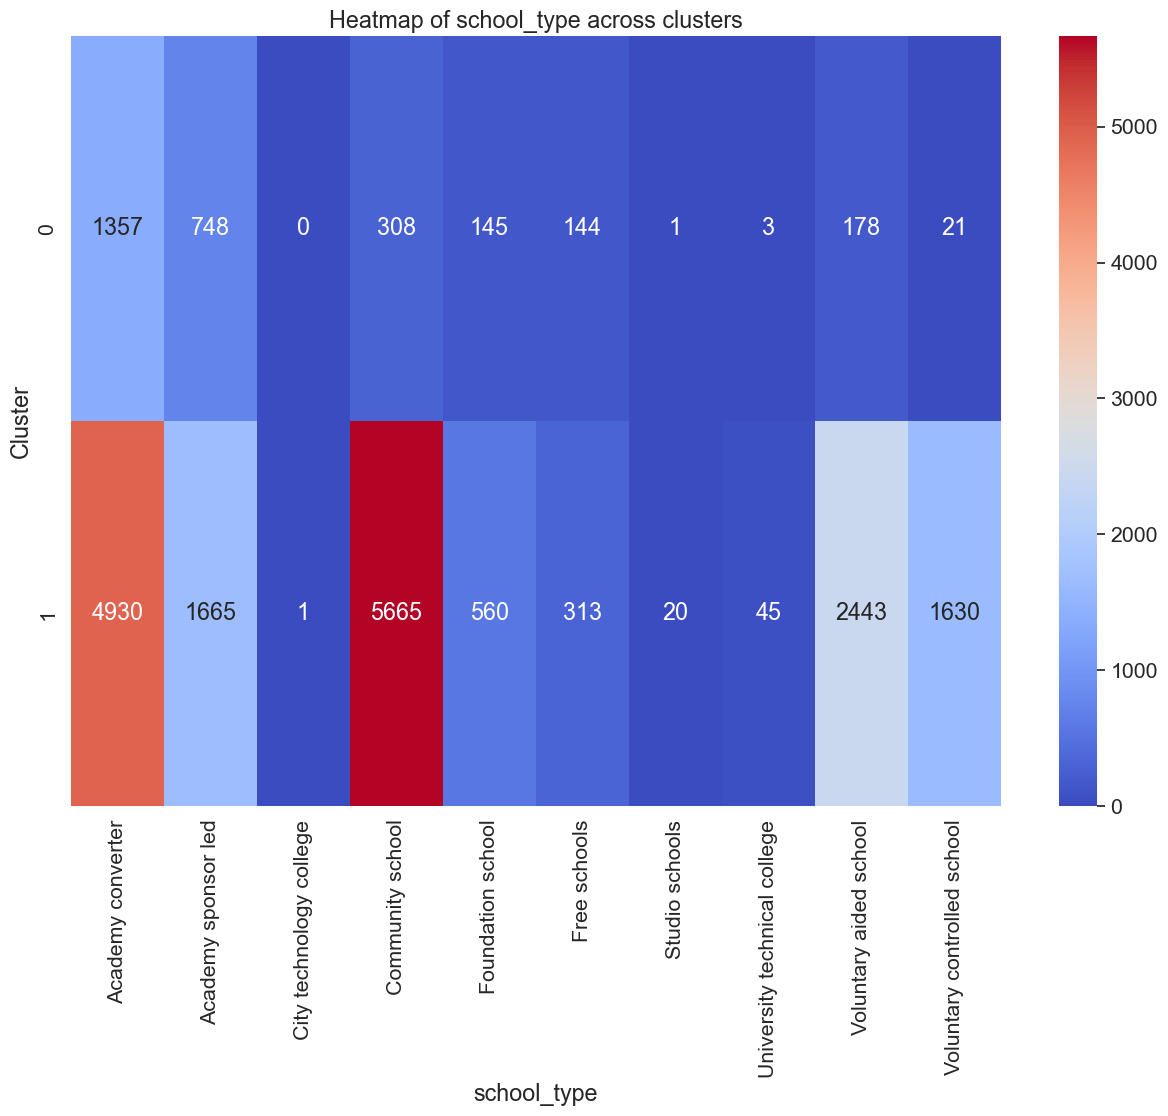

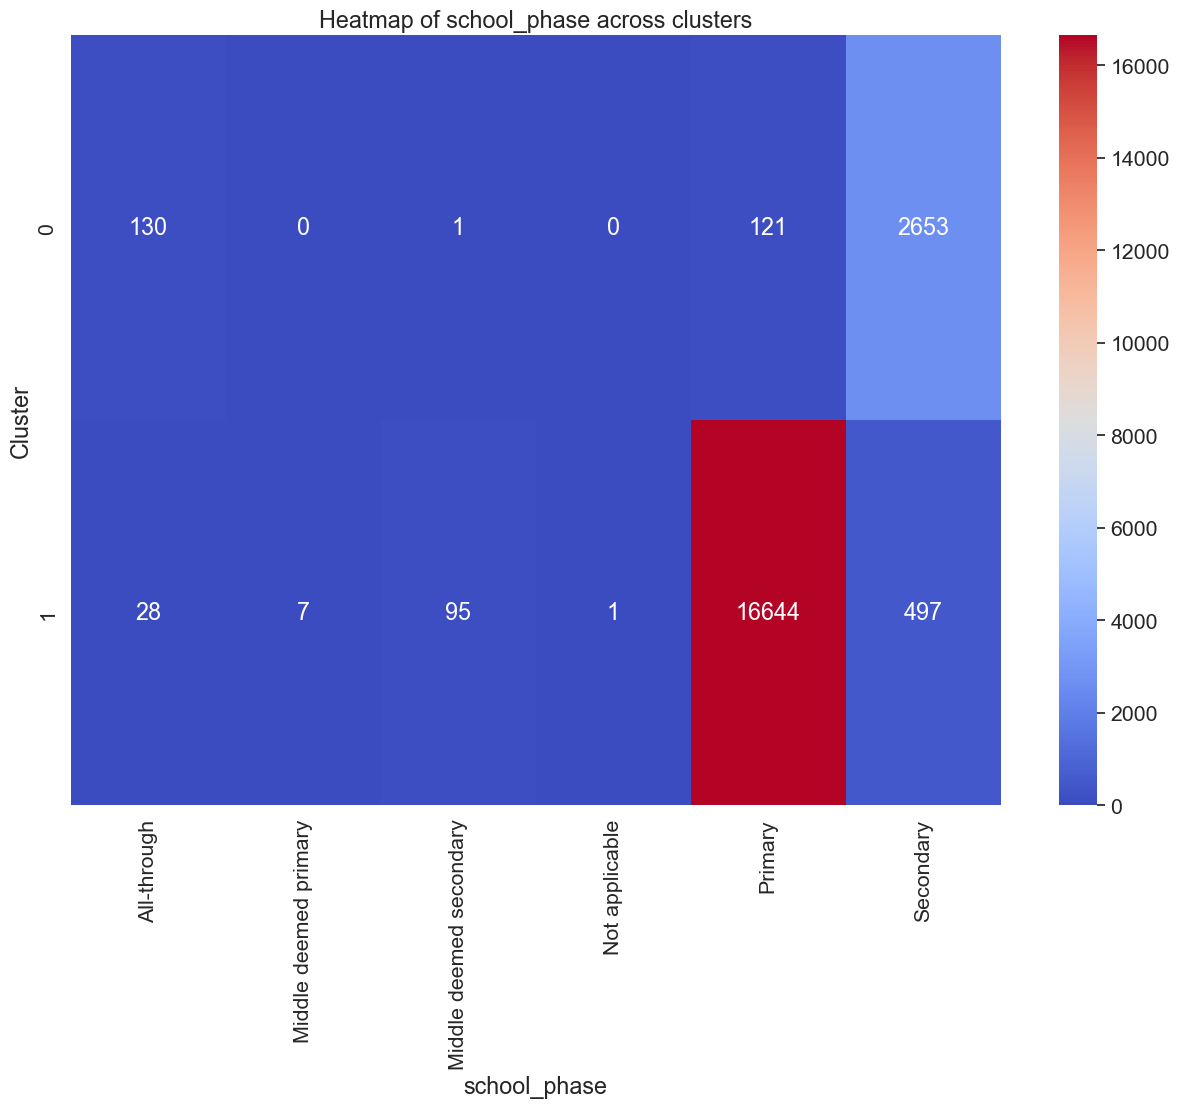

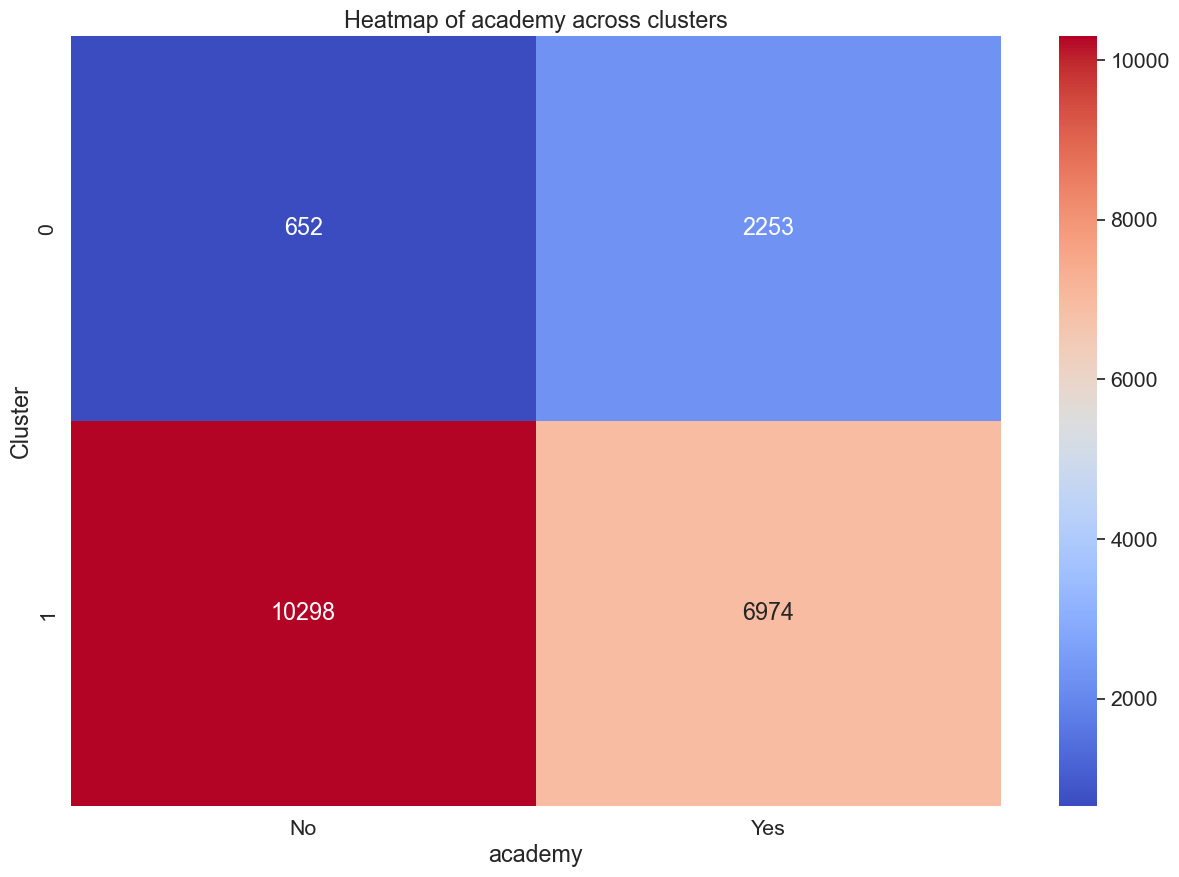

In [206]:
cat_features = fund_cat.columns.tolist()
for feature in cat_features:
    crosstab_data = pd.crosstab(index=fund['Cluster'],columns=fund[feature])
    
    plt.figure(figsize=(15,10))
    sns.set(font_scale=1.4)
    sns.heatmap(crosstab_data, annot=True, cmap='coolwarm', fmt='g')
    plt.title(f'Heatmap of {feature} across clusters')
    plt.show()